In [2]:
import csv, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 读取全部48万条所有数据
All_data = []
for i in range(10):
    All_data.append(pd.read_csv(f'../../preprocess_data/All_data_part{i}.csv', index_col=0, low_memory=False))
    # print(len(All_data[i].columns))
    
All_Ori = pd.concat(All_data)

In [4]:
print(All_Ori.columns)

Index(['required_header/download_date', 'required_header/link_text',
       'required_header/url', 'id_info/org_study_id', 'id_info/secondary_id',
       'id_info/nct_id', 'brief_title', 'sponsors/lead_sponsor/agency',
       'sponsors/lead_sponsor/agency_class', 'source',
       ...
       'expanded_access_info/expanded_access_type_intermediate',
       'expanded_access_info/expanded_access_type_treatment',
       'oversight_info/is_unapproved_device',
       'clinical_results/outcome_list/outcome/analysis_list/analysis/ci_upper_limit_na_comment',
       'expanded_access_info/expanded_access_type_individual',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/units',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/scope',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{group_id}',
       'clinical_results/baseline/measure_list/measure/analyzed_list/analyzed/count_list/count{value}',

/tmp/ipykernel_3707416/481113783.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  year = pd.to_datetime(All_Ori['start_date'], errors='coerce').dt.year


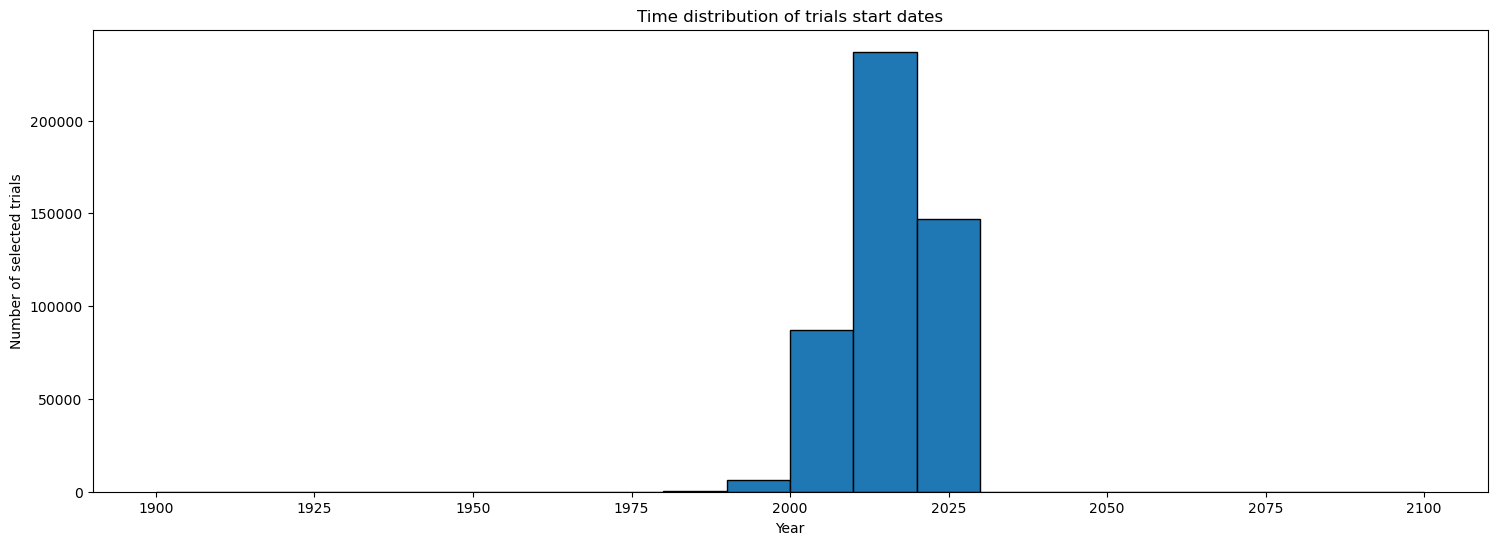

In [5]:
plt.figure(figsize=(18, 6))

year = pd.to_datetime(All_Ori['start_date'], errors='coerce').dt.year
plt.hist(year.dropna(), bins=20, edgecolor='black') # 画直方图， 大于2024年的扔掉
plt.xlabel('Year')
plt.ylabel('Number of selected trials')
plt.title('Time distribution of trials start dates')
plt.savefig(f'feature_fig/All_Time_distribution.png')

## 画time distribution

cat target completed_year 
sub plot: num-year , cls_num-year, 

In [6]:
task_name = 'trial-failure-reason-prediction'

In [7]:
train_x = pd.read_csv(f'{task_name}/train_x.csv', index_col=0)
train_y = pd.read_csv(f'{task_name}/train_y.csv', index_col=0)
test_x = pd.read_csv(f'{task_name}/test_x.csv', index_col=0)
test_y = pd.read_csv(f'{task_name}/test_y.csv', index_col=0)
# data = pd.concat([train_x, test_x], axis=0)

In [8]:
yeary = pd.concat([train_y, test_y], axis=0)
data = pd.concat([All_Ori.loc[yeary.index, ['completion_date']], yeary], axis=1)

In [9]:
data['completion_date'] = pd.to_datetime(data['completion_date'], errors='coerce')
data['Year'] = data['completion_date'].dt.year

In [10]:
yeary = pd.concat([train_y, test_y], axis=0)
data = pd.concat([All_Ori.loc[yeary.index, ['start_date']], yeary], axis=1)
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['Year'] = data['start_date'].dt.year

In [11]:
sum(data['Year'] > 2024)

20

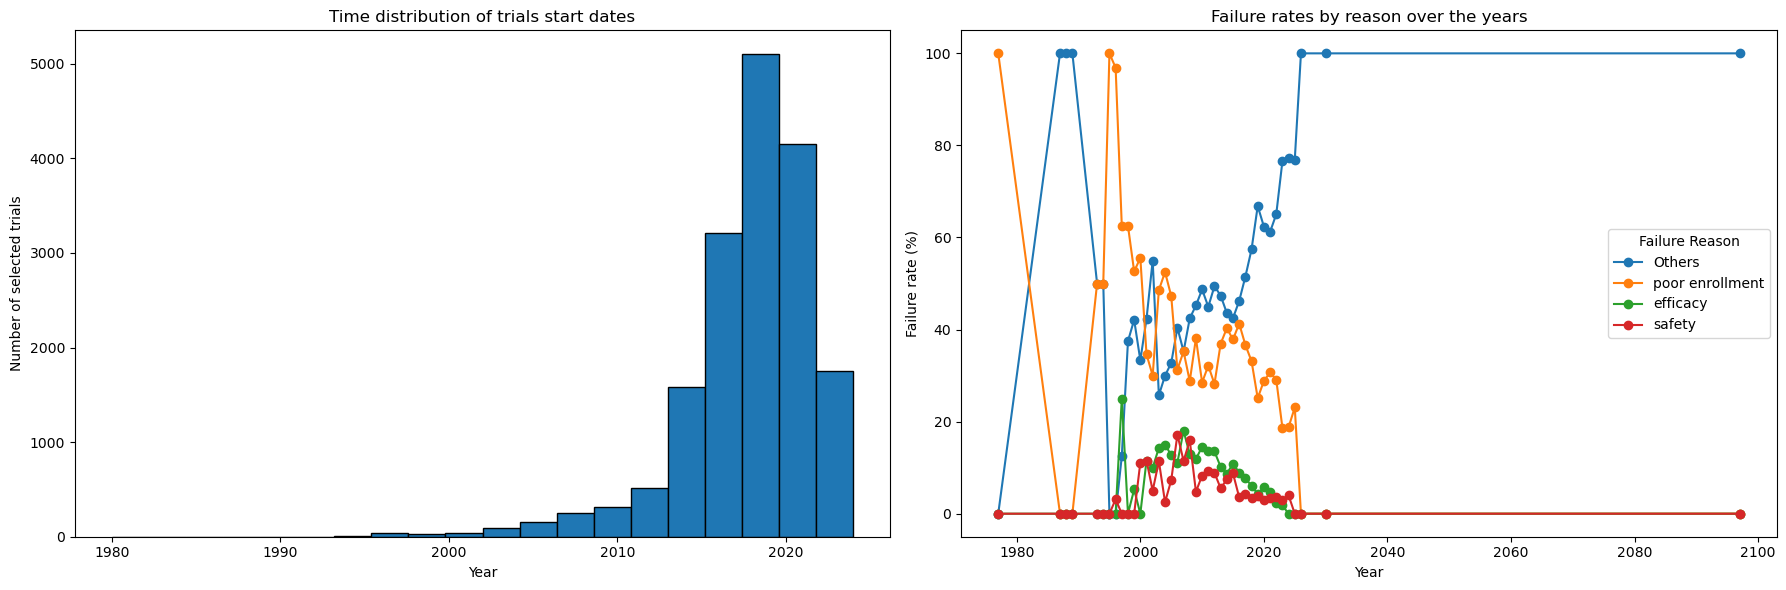

In [12]:
# 图A：时间分布直方图
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Year'].dropna(),range=(1980, 2024), bins=20, edgecolor='black') # 画直方图， 大于2024年的扔掉
plt.xlabel('Year')
plt.ylabel('Number of selected trials')
plt.title('Time distribution of trials start dates')

# 图B：成功率折线图
# 假设成功率可以根据failure_reason来计算
# 计算不同失败原因的成功率
failure_reasons = data['failure_reason'].unique()
reason_rates = {}
for reason in failure_reasons:
    reason_rates[reason] = data.groupby('Year')['failure_reason'].apply(lambda x: (x == reason).sum() / len(x) * 100)
    
plt.subplot(1, 2, 2)
for reason, rates in reason_rates.items():
    plt.plot(rates.index, rates.values, marker='o', label=reason)
plt.xlabel('Year')
plt.ylabel('Failure rate (%)')
plt.title('Failure rates by reason over the years')
plt.legend(title='Failure Reason')
# 图C：招募患者人数折线图
# 假设每个试验招募患者数可以随机生成或通过其他方式获得
# 这里使用随机生成示例数据


# 调整布局
plt.tight_layout()
plt.savefig(f'feature_fig/{task_name}_Time_distribution.png')
plt.show()

Adverse Event 等

In [13]:
task_name = 'adverse-event-rate-prediction/mortality_rate_'

In [14]:
train_y = pd.read_csv(f'{task_name}train_y.csv', index_col=0)
test_y = pd.read_csv(f'{task_name}test_y.csv', index_col=0)
yeary = pd.concat([train_y, test_y], axis=0)
data = pd.concat([All_Ori.loc[yeary.index, ['start_date']], yeary], axis=1)
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['Year'] = data['start_date'].dt.year

In [15]:
data['Y/N'].value_counts()

Y/N
0    20805
1    10501
Name: count, dtype: int64

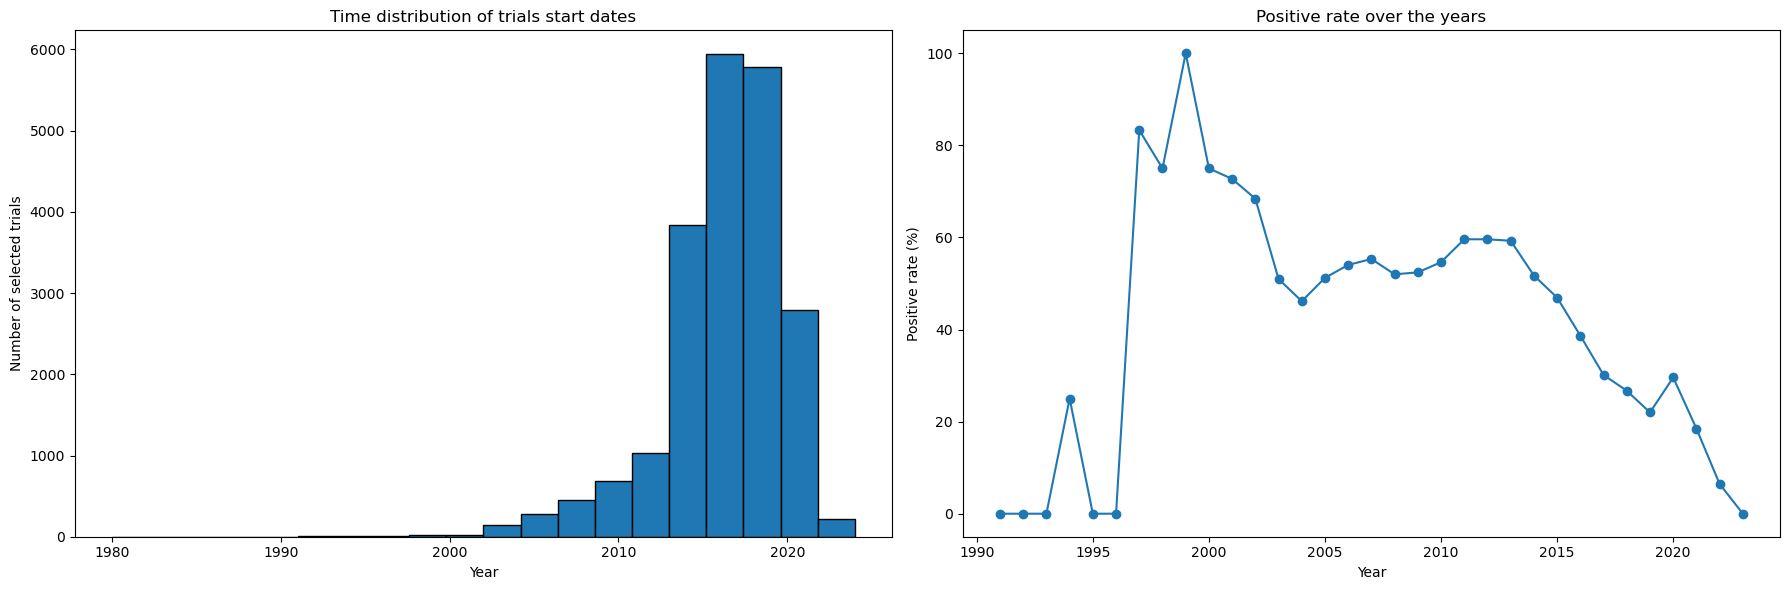

In [16]:
# 图A：时间分布直方图
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Year'].dropna(), range=(1980, 2024), bins=20, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of selected trials')
plt.title('Time distribution of trials start dates')

# 图B：成功率折线图
success_rate = data.groupby('Year')['Y/N'].apply(lambda x: (x == 1).sum() / len(x) * 100)
plt.subplot(1, 2, 2)
plt.plot(success_rate.index, success_rate.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Positive rate (%)')
plt.title('Positive rate over the years')

# 调整布局
plt.tight_layout()
plt.savefig(f'feature_fig/mortality_rate_Time_distribution.png')
plt.show()

Approval

In [17]:
task_name = 'trial-approval-prediction/'

In [18]:
train_y = pd.read_csv(f'{task_name}train_y.csv', index_col=0)
test_y = pd.read_csv(f'{task_name}test_y.csv', index_col=0)
yeary = pd.concat([train_y, test_y], axis=0)
data = pd.concat([All_Ori.loc[yeary.index, ['start_date']], yeary], axis=1)
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['Year'] = data['start_date'].dt.year

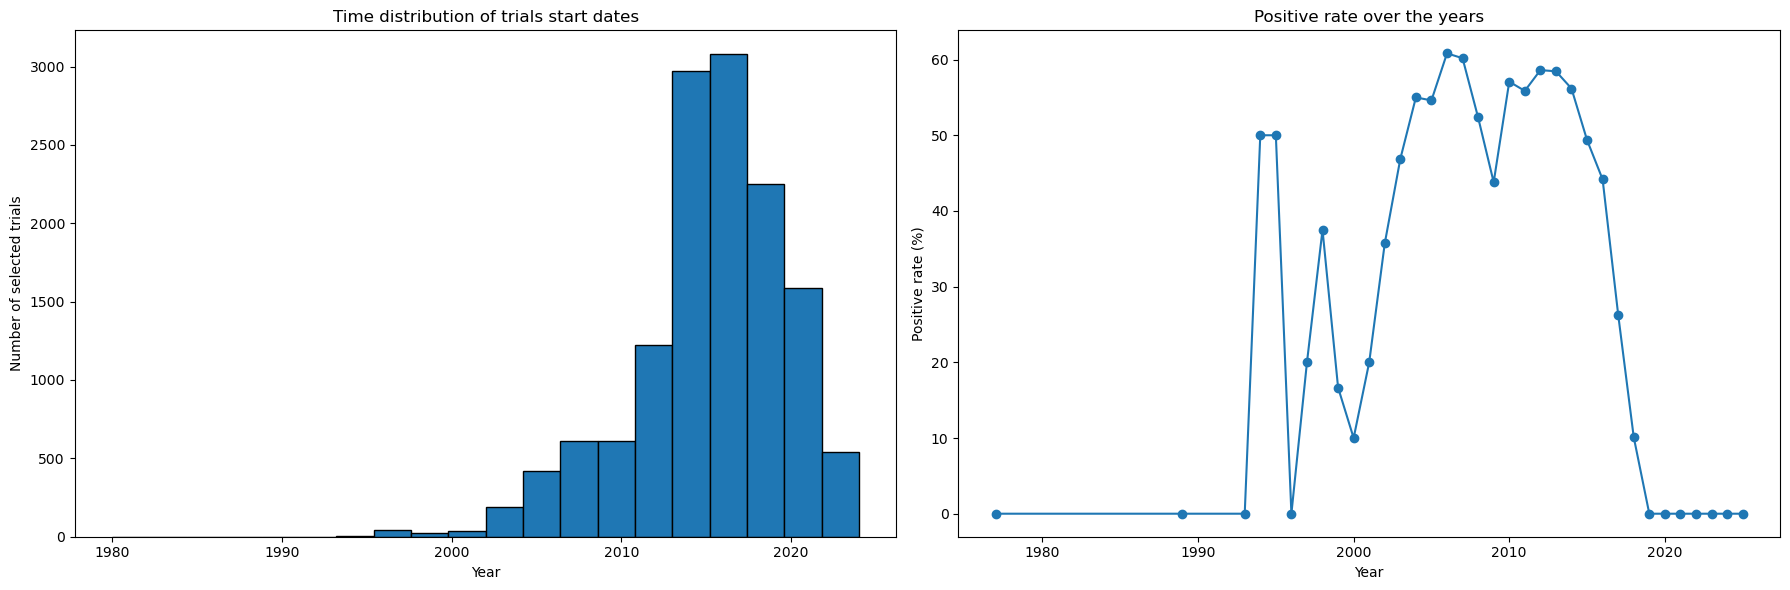

In [19]:
# 图A：时间分布直方图
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Year'].dropna(), range=(1980, 2024), bins=20, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of selected trials')
plt.title('Time distribution of trials start dates')

# 图B：成功率折线图
success_rate = data.groupby('Year')['outcome'].apply(lambda x: (x == 1).sum() / len(x) * 100)
plt.subplot(1, 2, 2)
plt.plot(success_rate.index, success_rate.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Positive rate (%)')
plt.title('Positive rate over the years')

# 调整布局
plt.tight_layout()
plt.savefig(f'feature_fig/{task_name[:-1]}_Time_distribution.png')
plt.show()

duration

In [20]:
task_name = 'trial-duration-prediction/'

In [21]:
train_y = pd.read_csv(f'{task_name}train_y_2022.csv', index_col=0)
test_y = pd.read_csv(f'{task_name}test_y_2022.csv', index_col=0)
data = pd.concat([train_y, test_y], axis=0)
# data = pd.concat([All_Ori.loc[yeary.index, ['start_date']], yeary], axis=1)
data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')
data['Year'] = data['start_date'].dt.year

/tmp/ipykernel_3707416/3685933847.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['start_date'] = pd.to_datetime(data['start_date'], errors='coerce')


In [22]:
sum(data['Year']<1940)

1

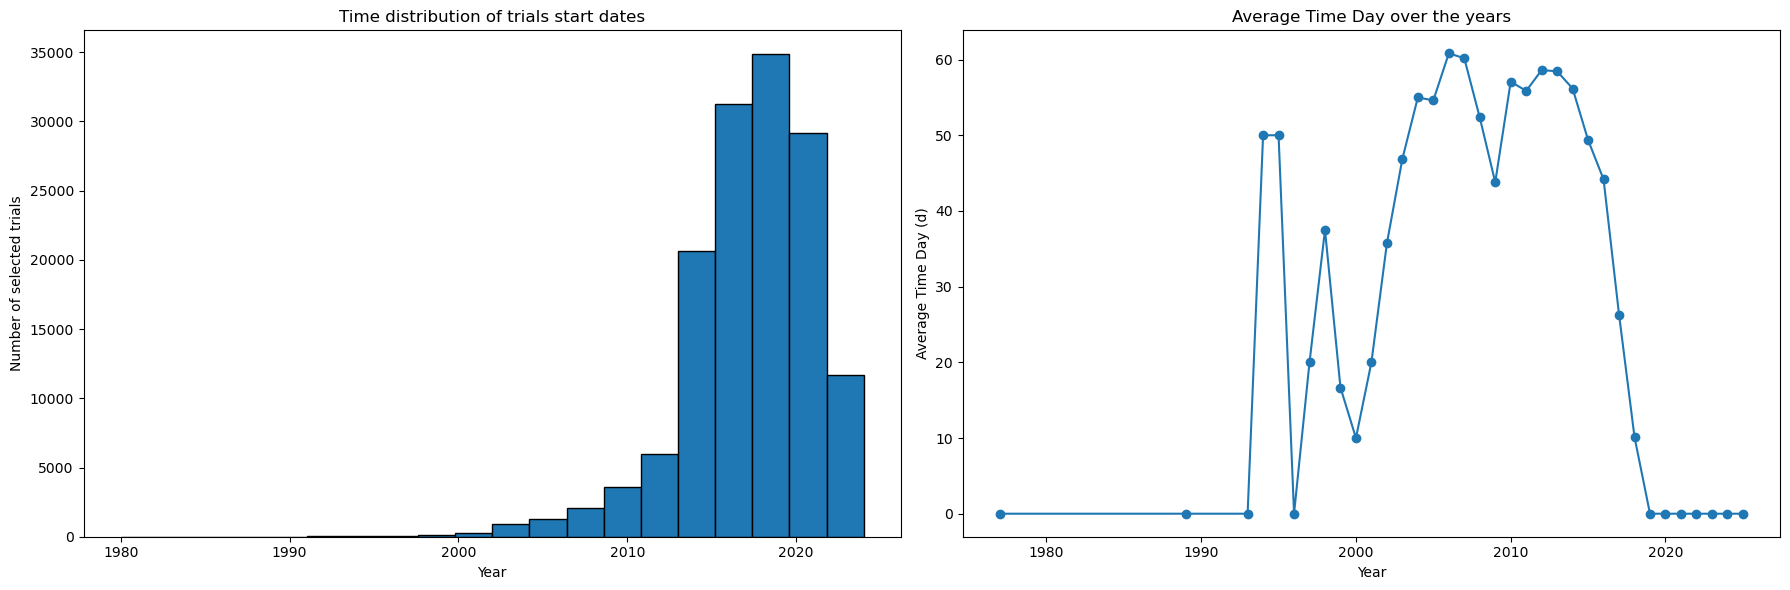

In [23]:
# 图A：时间分布直方图
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Year'].dropna(), bins=20, edgecolor='black', range=(1980, 2024))
plt.xlabel('Year')
plt.ylabel('Number of selected trials')
plt.title('Time distribution of trials start dates')

# 图B：Year-Time_day折线图
Avg_time_day = data.groupby('Year')['time_day'].mean()
plt.subplot(1, 2, 2)
plt.plot(success_rate.index, success_rate.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Time Day (d)')
plt.title('Average Time Day over the years')

# 调整布局
plt.tight_layout()
plt.savefig(f'feature_fig/{task_name[:-1]}_Time_distribution.png')
plt.show()

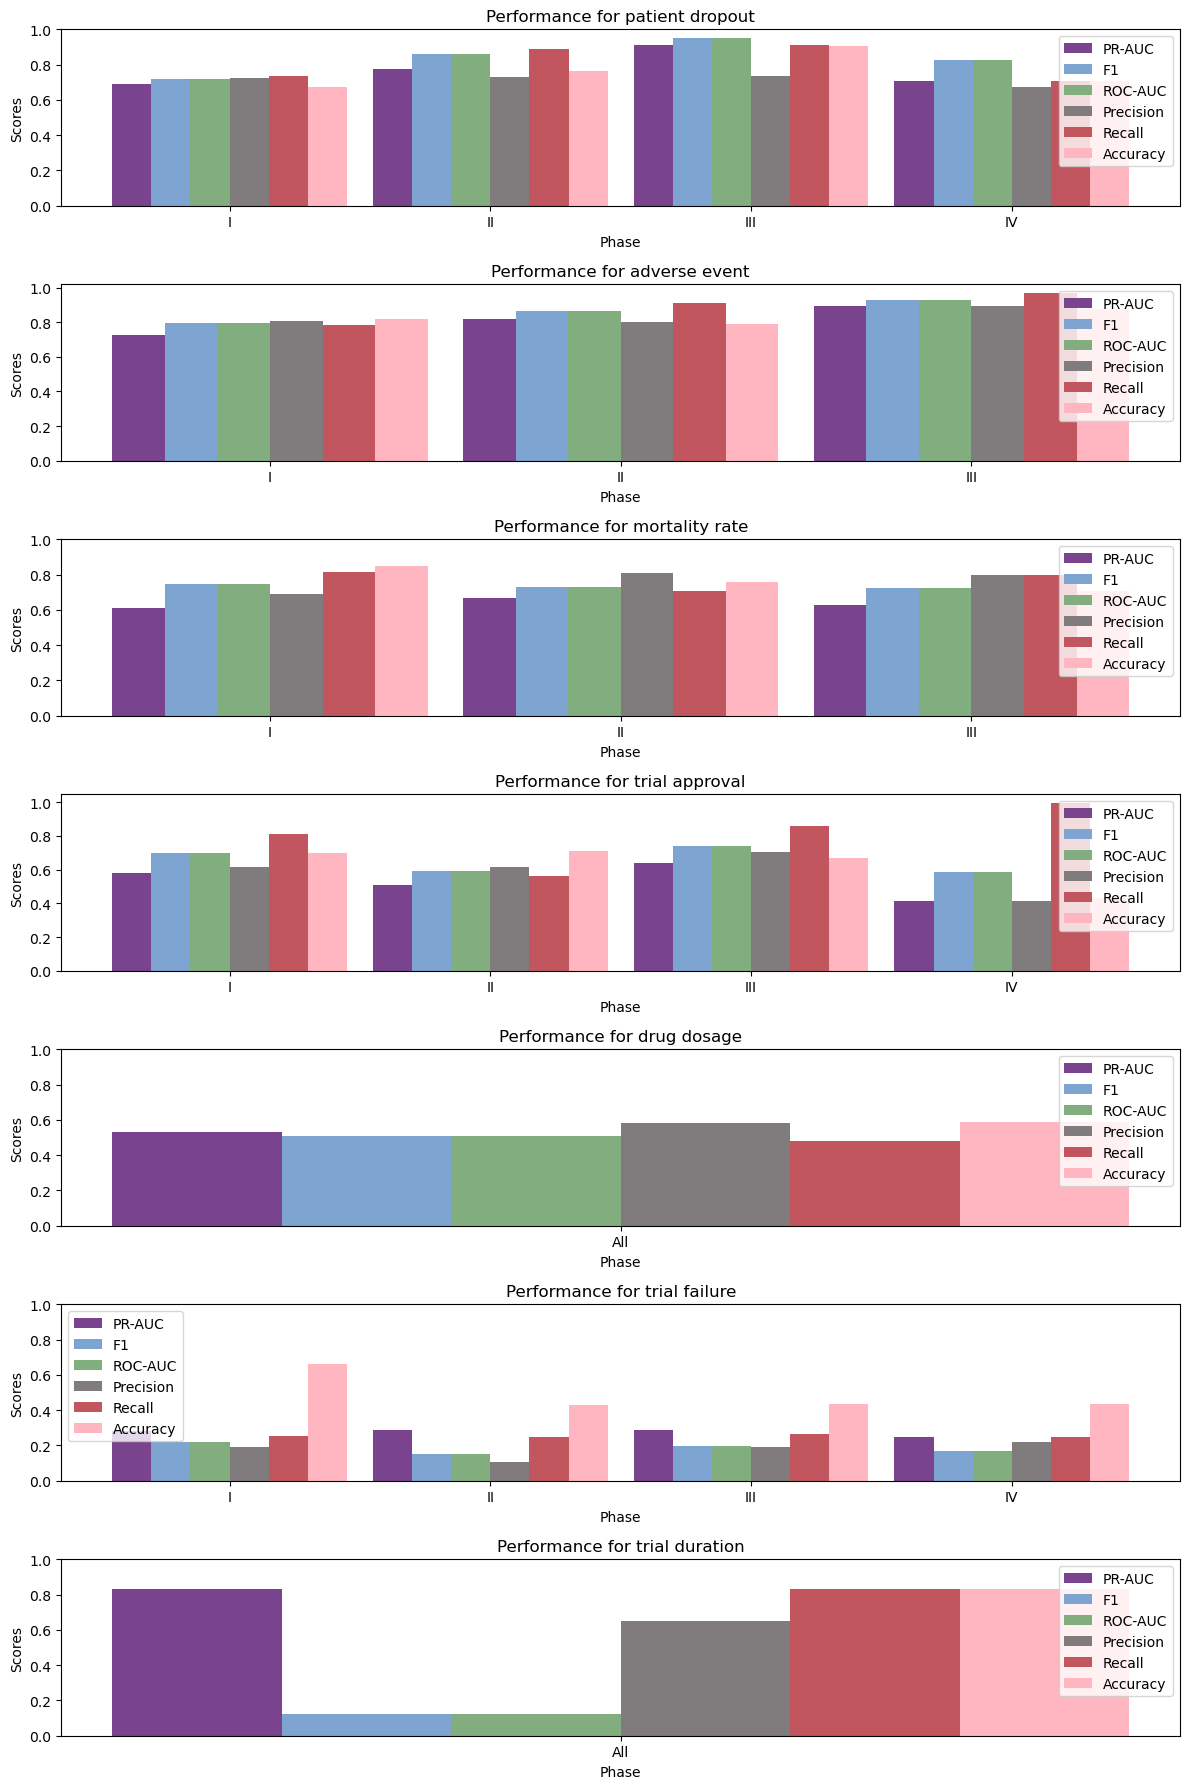

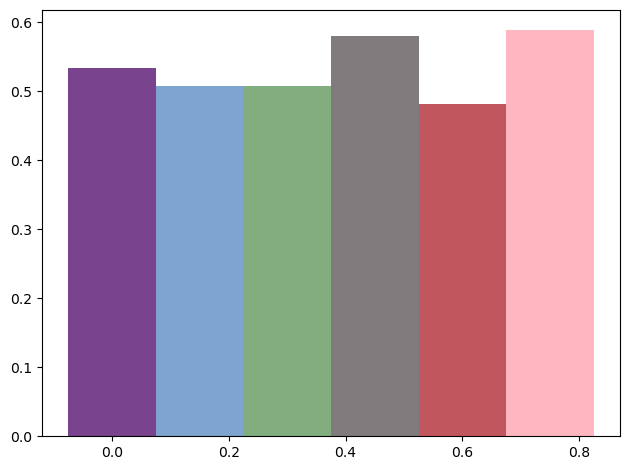

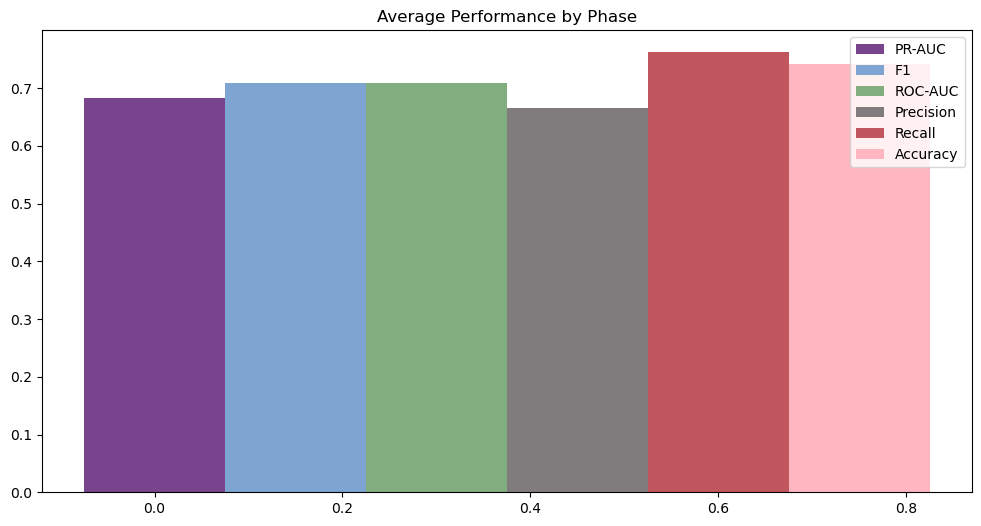

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设你的数据保存在一个CSV文件中
# data = pd.read_csv('/path/to/your/results.csv')

# 这里用示例数据创建一个DataFrame
data = pd.DataFrame({
    'Phase': ['I', 'II', 'III', 'IV', 'I', 'II', 'III', 'I', 'II', 'III', 'I', 'II', 'III', 'IV', 'All', 'I', 'II', 'III', 'IV', 'All'],
    'Task': ['patient dropout', 'patient dropout', 'patient dropout', 'patient dropout', 
             'adverse event', 'adverse event', 'adverse event', 
             'mortality rate', 'mortality rate', 'mortality rate', 
             'trial approval', 'trial approval', 'trial approval', 'trial approval', 
             'drug dosage', 
             'trial failure', 'trial failure', 'trial failure', 'trial failure', 
             'trial duration'],
    'PR-AUC': [0.6907, 0.7775, 0.9126, 0.7093, 0.7259, 0.8201, 0.8938, 0.6103, 0.6697, 0.6282, 0.5794, 0.5099, 0.6383, 0.4137, 0.5333, 0.2798, 0.2857, 0.2880, 0.2473, 0.8334],
    'F1': [0.7176, 0.8628, 0.9512, 0.8277, 0.7932, 0.8670, 0.9312, 0.7454, 0.7303, 0.7258, 0.7011, 0.5895, 0.7416, 0.5845, 0.5072, 0.2208, 0.1505, 0.1972, 0.1691, 0.1216],
    'ROC-AUC': [0.7176, 0.8628, 0.9512, 0.8277, 0.7932, 0.8670, 0.9312, 0.7454, 0.7303, 0.7258, 0.7011, 0.5895, 0.7416, 0.5845, 0.5072, 0.2208, 0.1505, 0.1972, 0.1691, 0.1216],
    'Precision': [0.7226, 0.7309, 0.7345, 0.6711, 0.8055, 0.7988, 0.8951, 0.6877, 0.8110, 0.7976, 0.6148, 0.6176, 0.7045, 0.4137, 0.5796, 0.1901, 0.1077, 0.1917, 0.2215, 0.6514],
    'Recall': [0.7331, 0.8881, 0.9126, 0.7093, 0.7824, 0.9109, 0.9704, 0.8160, 0.7051, 0.7994, 0.8102, 0.5640, 0.8599, 0.9969, 0.4811, 0.2523, 0.25, 0.2670, 0.2480, 0.8334],
    'Accuracy': [0.6738, 0.7634, 0.9073, 0.7071, 0.8211, 0.7910, 0.8779, 0.8511, 0.7609, 0.7095, 0.7012, 0.7089, 0.6677, 0.4315, 0.5882, 0.6617, 0.4310, 0.4356, 0.4327, 0.8334],
    'MAE': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.8334],
    'RMSE': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1.2611],
    'R^2': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0.6514]
})

# 画不同任务的性能表现柱状图
tasks = data['Task'].unique()
metrics = ['PR-AUC', 'F1', 'ROC-AUC', 'Precision', 'Recall', 'Accuracy']


fig, axes = plt.subplots(len(tasks), 1, figsize=(12, 18))

colors = ['#79438E', '#7EA4D1', '#82AD7F', '#807C7D', '#C1565E', '#FFB6C1']
for i, task in enumerate(tasks):
    task_data = data[data['Task'] == task]
    phases = task_data['Phase'].unique()
    bar_width = 0.15  # 每个柱子的宽度
    index = np.arange(len(phases))  # X轴的索引

    for j, metric in enumerate(metrics):
        axes[i].bar(index + j * bar_width, task_data[metric], bar_width, label=metric, color=colors[j])

    axes[i].set_xlabel('Phase')
    axes[i].set_ylabel('Scores')
    axes[i].set_title(f'Performance for {task}')
    axes[i].set_xticks(index + bar_width * (len(metrics) - 1) / 2)
    axes[i].set_yticks(np.arange(0, 1.2, 0.2))
    axes[i].set_xticklabels(phases)
    axes[i].legend()
    

plt.tight_layout()
plt.savefig(f'feature_fig/Performance_by_Task.png')
plt.show()

# 画不同Phase的平均表现柱状图
phase_performance = data.groupby('Phase')[metrics].mean()

fig, ax = plt.subplots(figsize=(12, 6))
for j, metric in enumerate(metrics):
    ax.bar(index + j * bar_width, phase_performance[metric], bar_width, label=metric, color=colors[j])
# for metric in metrics:
#     ax.bar(phase_performance.index, phase_performance[metric], bar_width,label=metric, alpha=0.7)
ax.set_title('Average Performance by Phase')
ax.legend()
plt.show()



In [ ]:
data

,Phase,Task,PR-AUC,F1,ROC-AUC,Precision,Recall,Accuracy,MAE,RMSE,R^2
0,I,patient dropout,0.6907,0.7176,0.7176,0.7226,0.7331,0.6738,NaN,NaN,NaN
1,II,patient dropout,0.7775,0.8628,0.8628,0.7309,0.8881,0.7634,NaN,NaN,NaN
2,III,patient dropout,0.9126,0.9512,0.9512,0.7345,0.9126,0.9073,NaN,NaN,NaN
3,IV,patient dropout,0.7093,0.8277,0.8277,0.6711,0.7093,0.7071,NaN,NaN,NaN
4,I,adverse event,0.7259,0.7932,0.7932,0.8055,0.7824,0.8211,NaN,NaN,NaN
5,II,adverse event,0.8201,0.8670,0.8670,0.7988,0.9109,0.7910,NaN,NaN,NaN
6,III,adverse event,0.8938,0.9312,0.9312,0.8951,0.9704,0.8779,NaN,NaN,NaN
7,I,mortality rate,0.6103,0.7454,0.7454,0.6877,0.8160,0.8511,NaN,NaN,NaN
8,II,mortality rate,0.6697,0.7303,0.7303,0.8110,0.7051,0.7609,NaN,NaN,NaN
9,III,mortality rate,0.6282,0.7258,0.7258,0.7976,0.7994,0.7095,NaN,NaN,NaN
